# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_humidity = city_weather['main']['humidity']
        city_clouds = city_clouds = city_weather['clouds']['all']
        city_wind = city_wind = city_weather['wind']['speed']
        city_country = city_country = city_weather['sys']['country']
        city_date = city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | tuba city
Processing Record 3 of Set 1 | bandundu
Processing Record 4 of Set 1 | kemijarvi
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | novodvinsk
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | kidal
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | utrik
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | ashland
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | contamana
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | stanley
Proces

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,0.37,97,100,3.34,GS,1728617081
1,tuba city,36.1350,-111.2399,22.68,17,69,1.37,US,1728617083
2,bandundu,-3.3167,17.3667,22.20,95,25,0.78,CD,1728617084
3,kemijarvi,66.7131,27.4306,4.59,95,100,7.08,FI,1728617085
4,albany,42.6001,-73.9662,8.58,67,5,0.89,US,1728617086


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("../Starter_Code/output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("../Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.37,97,100,3.34,GS,1728617081
1,tuba city,36.1350,-111.2399,22.68,17,69,1.37,US,1728617083
2,bandundu,-3.3167,17.3667,22.20,95,25,0.78,CD,1728617084
3,kemijarvi,66.7131,27.4306,4.59,95,100,7.08,FI,1728617085
4,albany,42.6001,-73.9662,8.58,67,5,0.89,US,1728617086


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

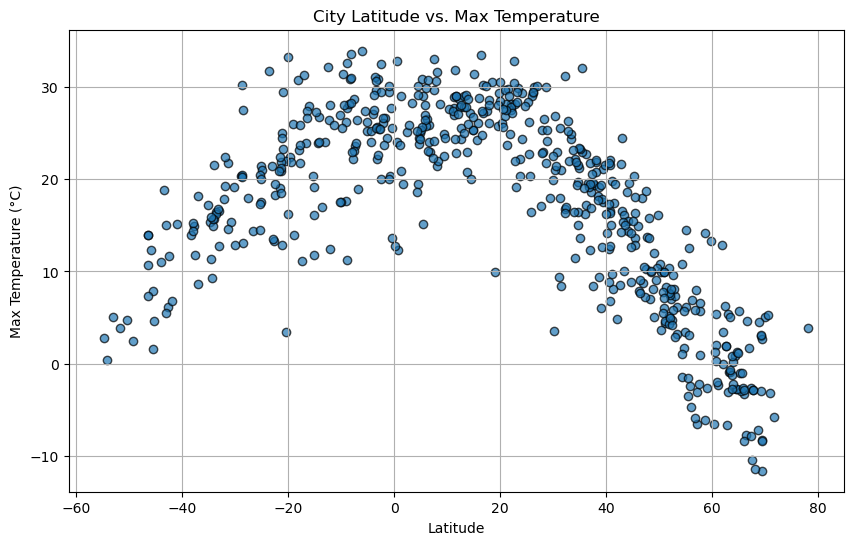

In [24]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("../Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

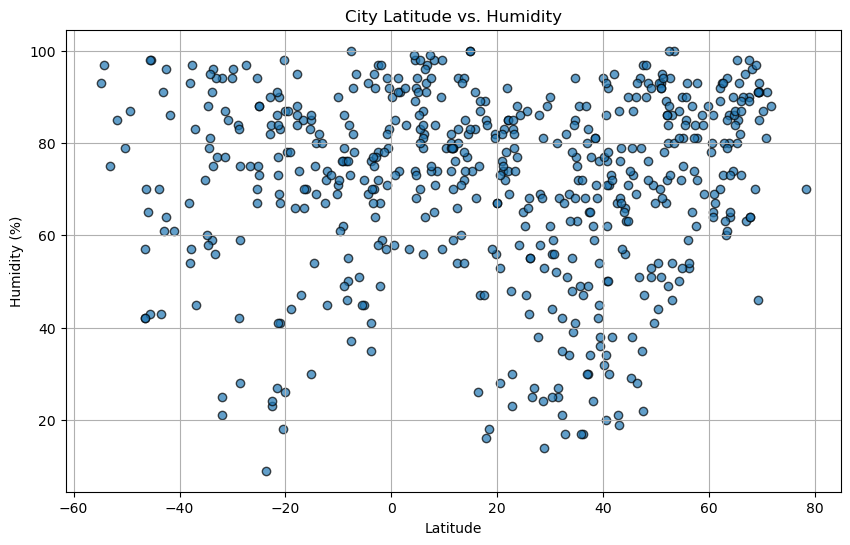

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

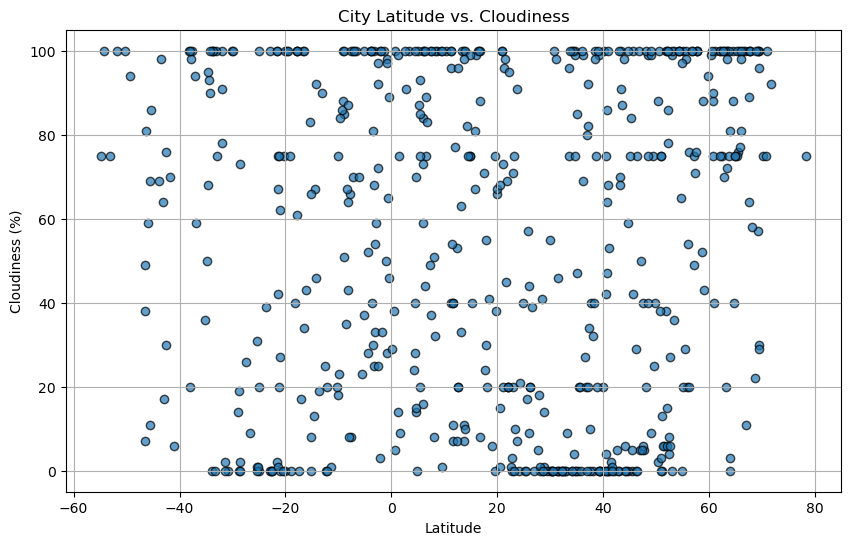

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

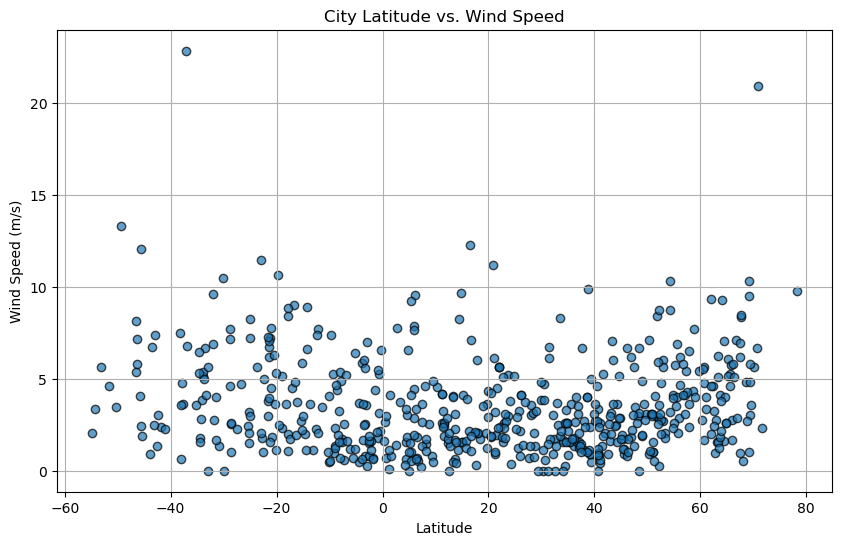

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', edgecolor='black', alpha=0.7)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, x_label, y_label, title, output_filename):
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, marker='o', edgecolor='black', alpha=0.7)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept

    # Add the linear regression line
    plt.plot(x, line, color='red')

    # Annotate the plot with the equation and R^2 value
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$',
                 xy=(0.05, 0.95), 
                 xycoords='axes fraction', 
                 fontsize=12, 
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightgray'))

    # Incorporate other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Save the figure
    plt.savefig(output_filename)
    plt.show()



In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tuba city,36.1350,-111.2399,22.68,17,69,1.37,US,1728617083
3,kemijarvi,66.7131,27.4306,4.59,95,100,7.08,FI,1728617085
4,albany,42.6001,-73.9662,8.58,67,5,0.89,US,1728617086
5,novodvinsk,64.4165,40.8122,0.86,90,100,7.05,RU,1728617087
6,isafjordur,66.0755,-23.1240,-3.29,73,81,2.73,IS,1728617088


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.37,97,100,3.34,GS,1728617081
2,bandundu,-3.3167,17.3667,22.20,95,25,0.78,CD,1728617084
7,blackmans bay,-43.0167,147.3167,15.07,61,17,7.39,AU,1728617089
9,hermanus,-34.4187,19.2345,9.33,79,93,1.79,ZA,1728617091
10,arraial do cabo,-22.9661,-42.0278,21.37,90,100,11.43,BR,1728617093


###  Temperature vs. Latitude Linear Regression Plot

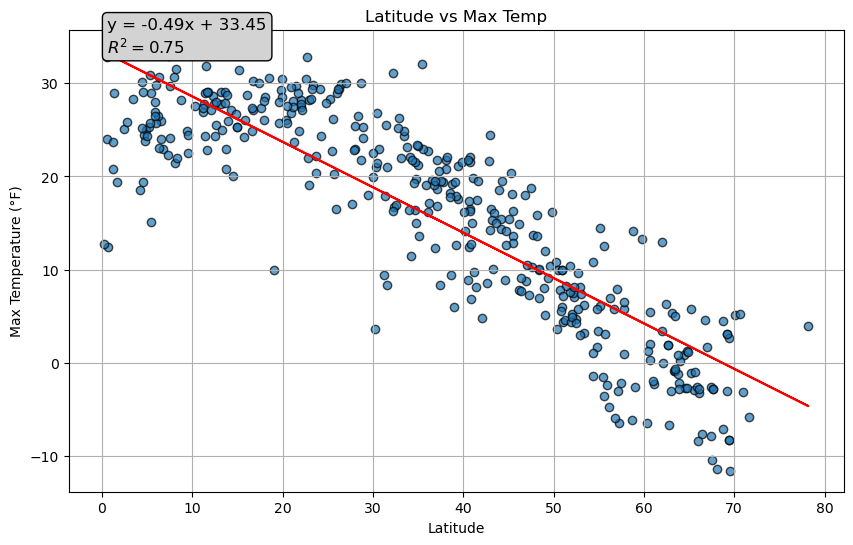

In [39]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"], 
    "Latitude", 
    "Max Temperature (°F)", 
    "Latitude vs Max Temp", 
    "../Starter_Code/output_data/LinearRegress_NH_Lat_Temp.png"
)

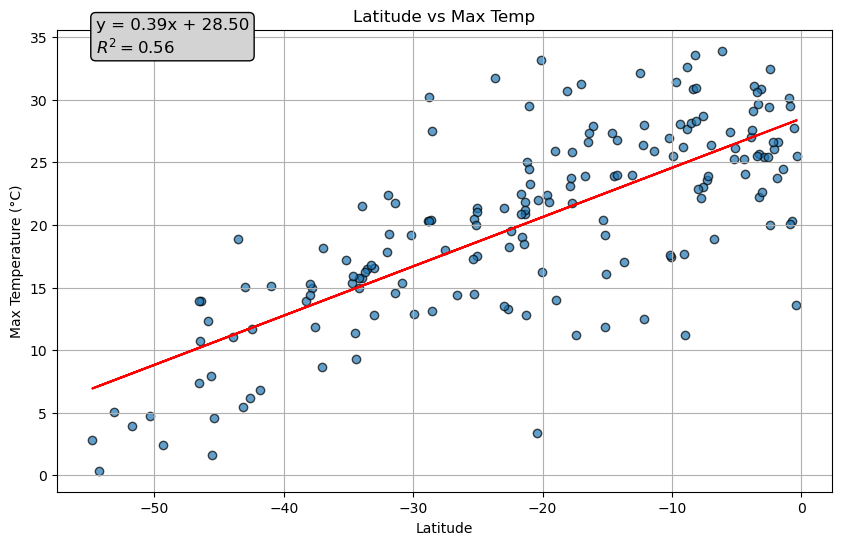

In [41]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"], 
    "Latitude", 
    "Max Temperature (°C)", 
    "Latitude vs Max Temp",  # Updated title
    "../Starter_Code/output_data/LinearRegress_SH_Lat_Temp.png"
)

**Discussion about the linear relationship:** In the Northern Hemisphere, temperature decreases as latitude increases (it gets colder farther from the equator). In the Southern Hemisphere, temperature increases as latitude moves toward the equator (it gets warmer).The R^2 value is higher in the Northern Hemisphere (0.75 vs. 0.56), meaning the relationship between latitude and temperature is stronger and more consistent there compared to the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

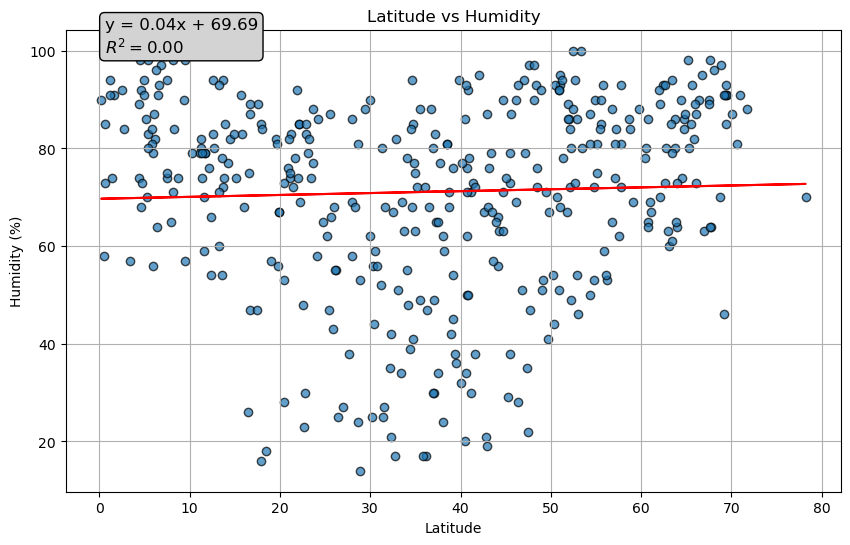

In [42]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"], 
    "Latitude", 
    "Humidity (%)", 
    "Latitude vs Humidity",  # Title
    "../Starter_Code/output_data/LinearRegress_NH_Lat_Humidity.png"
)

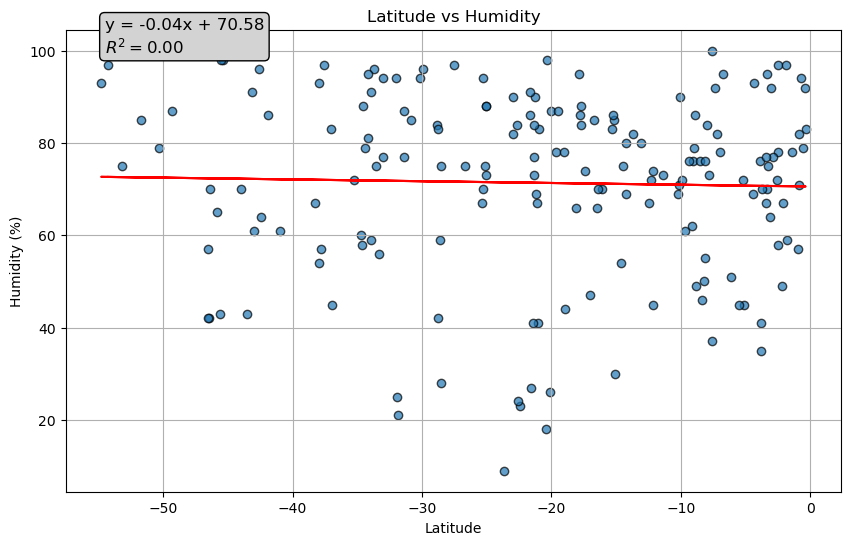

In [43]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"], 
    "Latitude", 
    "Humidity (%)", 
    "Latitude vs Humidity",  # Title
    "../Starter_Code/output_data/LinearRegress_SH_Lat_Humidity.png"
)

**Discussion about the linear relationship:** The two scatter plots show that there is no clear link between latitude and humidity in either hemisphere. The trend lines are nearly flat, and the R^2 values of 0.00 mean that latitude doesn’t explain the changes in humidity. Most humidity levels are between 60% and 100%, and the data is scattered. This suggests that other factors, like local geography or weather, affect humidity more than latitude.

### Cloudiness vs. Latitude Linear Regression Plot

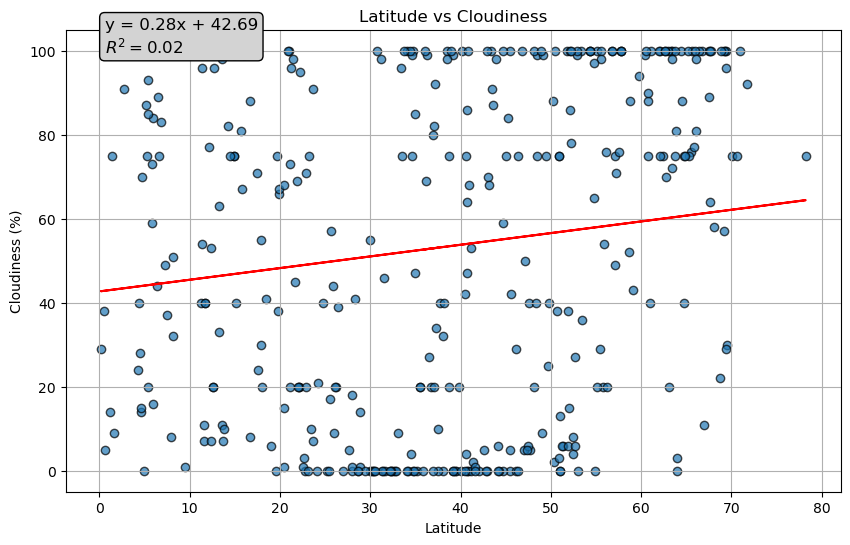

In [44]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Cloudiness"], 
    "Latitude", 
    "Cloudiness (%)", 
    "Latitude vs Cloudiness",  # Title
    "../Starter_Code/output_data/LinearRegress_NH_Lat_Cloudiness.png"
)

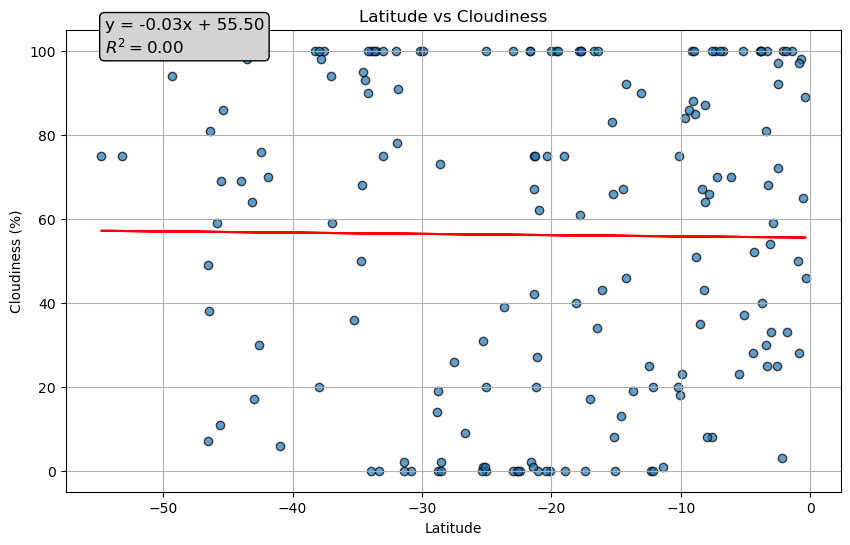

In [45]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Cloudiness"], 
    "Latitude", 
    "Cloudiness (%)", 
    "Latitude vs Cloudiness",  # Title
    "../Starter_Code/output_data/LinearRegress_SH_Lat_Cloudiness.png"
)

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a very weak link between latitude and cloudiness, meaning cloudiness increases slightly as you move further north, but the effect is tiny. In the Southern Hemisphere, there is no connection at all between latitude and cloudiness. In both cases, latitude does not explain much about cloudiness, so other factors are likely more important.

### Wind Speed vs. Latitude Linear Regression Plot

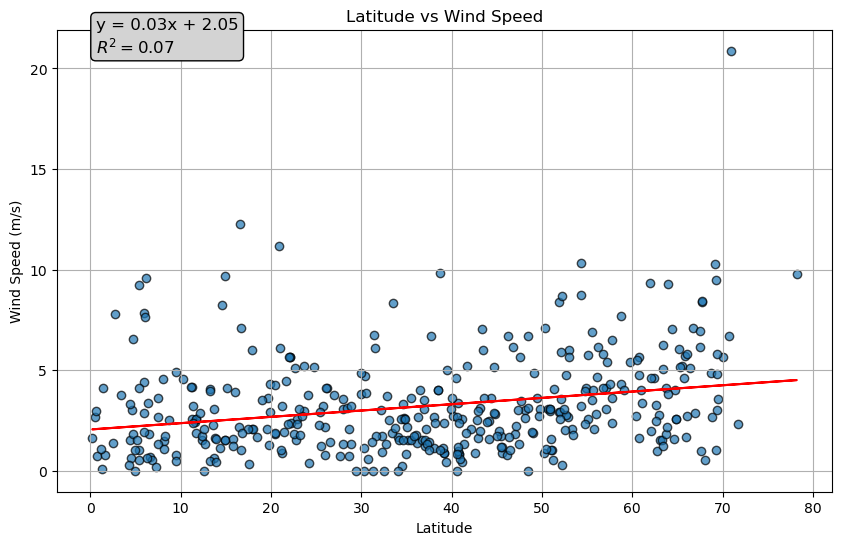

In [46]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    "Latitude", 
    "Wind Speed (m/s)", 
    "Latitude vs Wind Speed",  # Title
    "../Starter_Code/output_data/LinearRegress_NH_Lat_WindSpeed.png"
)

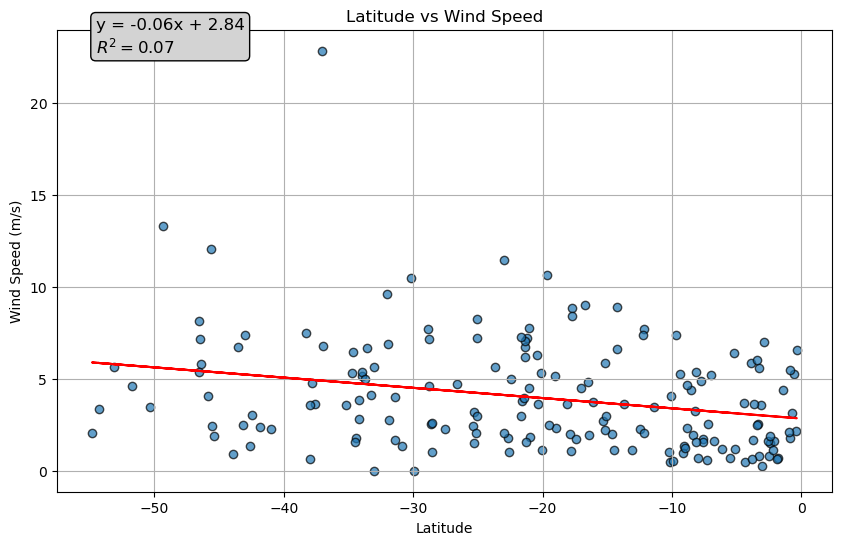

In [47]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Wind Speed"], 
    "Latitude", 
    "Wind Speed (m/s)", 
    "Latitude vs Wind Speed",  # Title
    "../Starter_Code/output_data/LinearRegress_SH_Lat_WindSpeed.png"
)

**Discussion about the linear relationship:** The two plots show a weak relationship between latitude and wind speed in both hemispheres. In the Northern Hemisphere, wind speed slightly increases with latitude, while in the Southern Hemisphere, it slightly decreases. However, in both cases, the R^2 values are very low (0.07), meaning latitude has little influence on wind speed.